In [4]:
import matplotlib.pyplot as plt
import model_functions as mf
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

PBP_DF = pd.read_csv("data/play_by_play_parsed.csv")
BLUE   = sns.color_palette()[0]
ORANGE = sns.color_palette()[1]
GREEN  = sns.color_palette()[2]
RED    = sns.color_palette()[3]

Training Accuracy: 0.99942	Validation Accuracy:0.71091


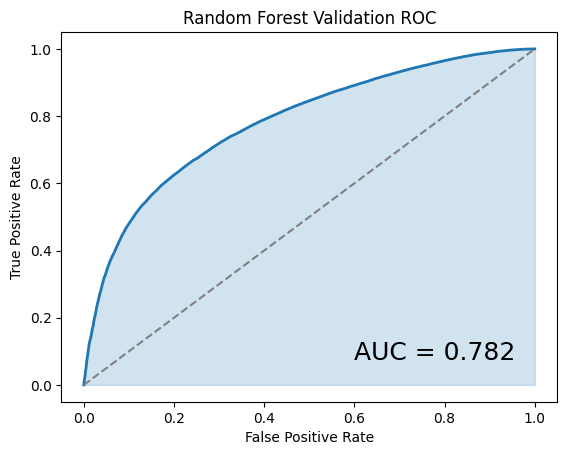

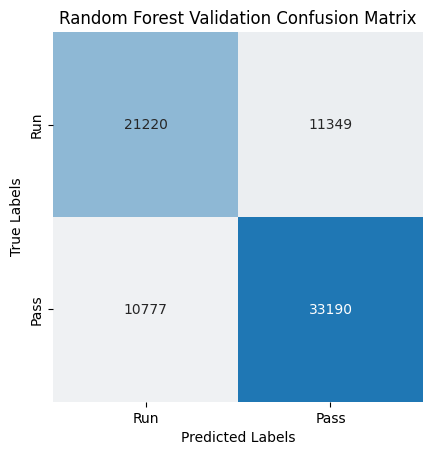

In [3]:
(train_X, train_y), (val_X, val_y), (test_X, test_y) = mf.split_data(PBP_DF)
basic_model = RandomForestClassifier(n_estimators=250)
basic_model.fit(train_X, train_y)

train, validation = mf.accuracies(basic_model, train_X, train_y, val_X, val_y)
print(f"Training Accuracy: {train:.5f}\tValidation Accuracy:{validation:.5f}")

mf.plot_roc(basic_model, val_X, val_y, color=BLUE, title="Random Forest Validation ROC")
mf.plot_confusion_matrix(basic_model, val_X, val_y, color=BLUE, title="Random Forest Validation Confusion Matrix")

Training Accuracy: 0.99942	Validation Accuracy:0.71097


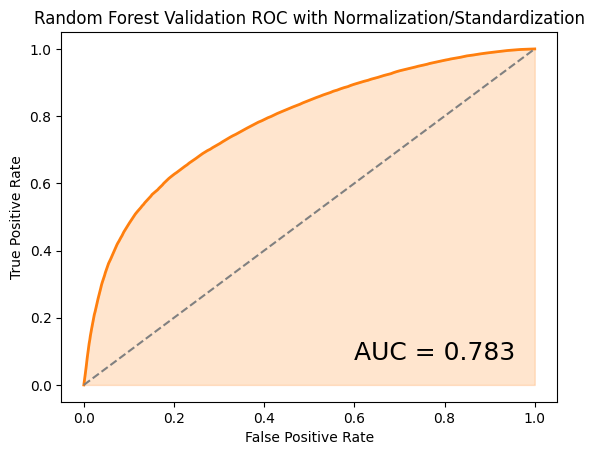

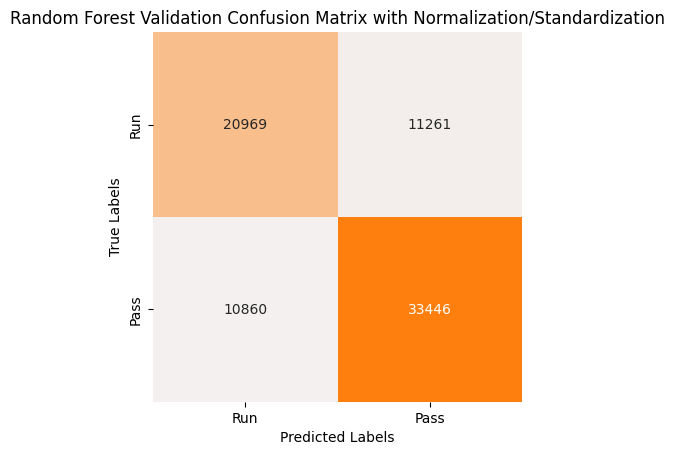

In [4]:
(train_X, train_y), (val_X, val_y), (test_X, test_y) = mf.split_data(PBP_DF, normalize=True, standardize=True)
feature_engineered_model = RandomForestClassifier(n_estimators=250)
feature_engineered_model.fit(train_X, train_y)

train, validation = mf.accuracies(feature_engineered_model, train_X, train_y, val_X, val_y)
print(f"Training Accuracy: {train:.5f}\tValidation Accuracy:{validation:.5f}")

mf.plot_roc(feature_engineered_model, val_X, val_y, color=ORANGE, title="Random Forest Validation ROC with Normalization/Standardization")
mf.plot_confusion_matrix(feature_engineered_model, val_X, val_y, color=ORANGE, title="Random Forest Validation Confusion Matrix with Normalization/Standardization")

Training Accuracy: 0.99996	Validation Accuracy:0.71275


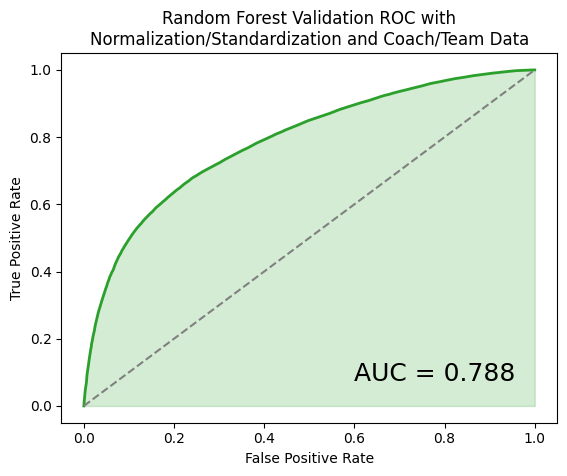

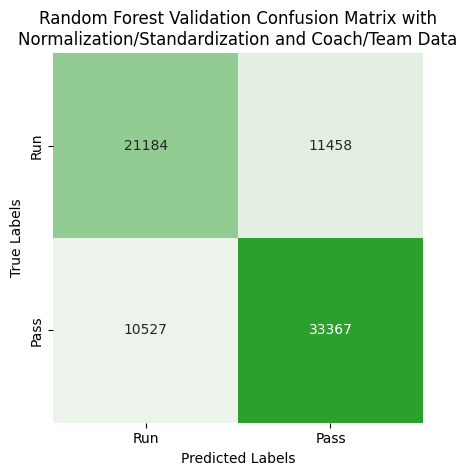

In [5]:
(train_X, train_y), (val_X, val_y), (test_X, test_y) = mf.split_data(PBP_DF, id_info=True, normalize=True, standardize=True)
identity_model = RandomForestClassifier(n_estimators=250)
identity_model.fit(train_X, train_y)

train, validation = mf.accuracies(identity_model, train_X, train_y, val_X, val_y)
print(f"Training Accuracy: {train:.5f}\tValidation Accuracy:{validation:.5f}")

mf.plot_roc(identity_model, val_X, val_y, color=GREEN, title="Random Forest Validation ROC with\nNormalization/Standardization and Coach/Team Data")
mf.plot_confusion_matrix(identity_model, val_X, val_y, color=GREEN, title="Random Forest Validation Confusion Matrix with\nNormalization/Standardization and Coach/Team Data")

Training Accuracy: 0.99997	Validation Accuracy:0.71224


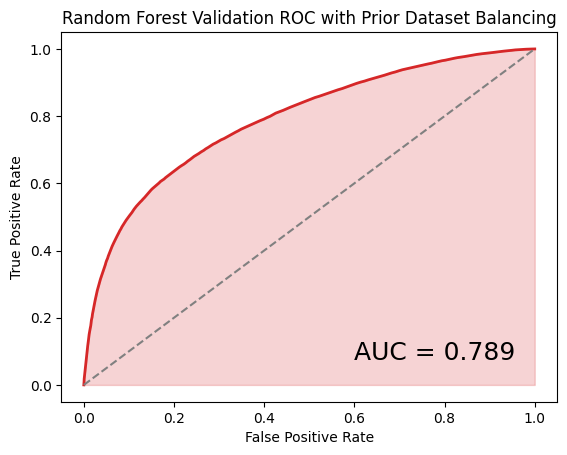

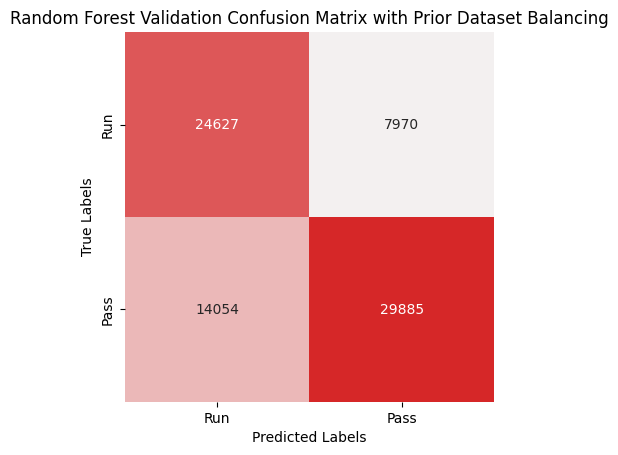

In [6]:
(train_X, train_y), (val_X, val_y), (test_X, test_y) = mf.split_data(PBP_DF, balance=True, id_info=True, normalize=True, standardize=True)
balanced_model = RandomForestClassifier(n_estimators=250)
balanced_model.fit(train_X, train_y)

train, validation = mf.accuracies(balanced_model, train_X, train_y, val_X, val_y)
print(f"Training Accuracy: {train:.5f}\tValidation Accuracy:{validation:.5f}")

mf.plot_roc(balanced_model, val_X, val_y, color=RED, title="Random Forest Validation ROC with Prior Dataset Balancing")
mf.plot_confusion_matrix(balanced_model, val_X, val_y, color=RED, title="Random Forest Validation Confusion Matrix with Prior Dataset Balancing")

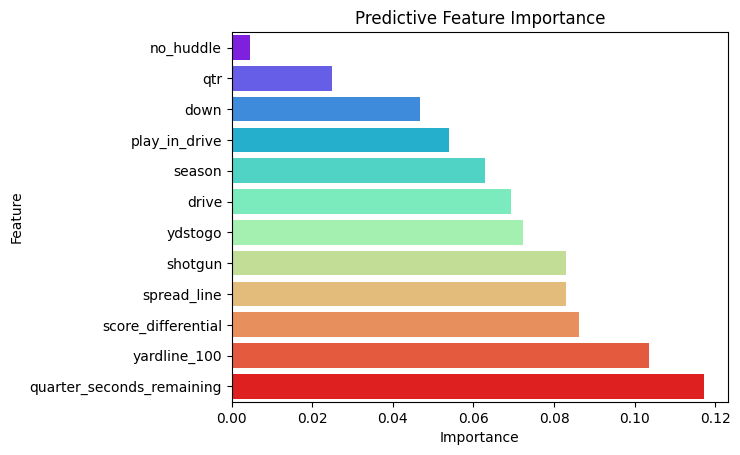

In [6]:
from matplotlib.cm import rainbow 

model = identity_model
encoded_df = pd.get_dummies(PBP_DF, columns=['posteam', 'coach'])

feature_importance = pd.Series(model.feature_importances_, index=encoded_df.columns[1:])
feature_importance = feature_importance[~feature_importance.index.str.startswith('coach_')]
feature_importance = feature_importance[~feature_importance.index.str.startswith('posteam_')]
feature_importance = feature_importance.sort_values()

num_features = len(feature_importance)
colors = rainbow(np.linspace(0, 1, num_features))

sns.barplot(x=feature_importance, y=feature_importance.index, palette=colors)
plt.title("Predictive Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [7]:
import pickle
with open("models/random_forest.model", "wb") as pickle_out:
    pickle.dump(model, pickle_out)